# <a href="https://mipt-stats.gitlab.io/courses/python.html">Python для анализа данных</a>

## Библиотека `matplotlib`

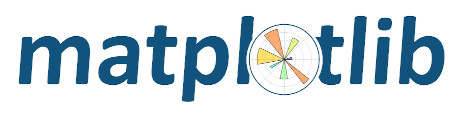

Matplotlib — популярная Python-библиотека для визуализации данных. Она используется для создания любых видов графиков: линейных, круговых диаграмм, построчных гистограмм и других — в зависимости от задач. Если в `jupyter notebook` выполнить специальную магическую команду `%matplotlib inline`, то графики будут строиться в том же окне браузера. Есть другие варианты, в которых графики показываются в отдельных окнах. Это удобно для трёхмерных графиков — тогда их можно вертеть мышкой (в случае inline графиков это невозможно). Графики можно также сохранять в файлы, как в векторных форматах (`eps`, `pdf`, `svg`), так и в растровых (`png`, `jpg`). `matplotlib` позволяет строить двумерные графики практически всех нужных типов, с достаточно гибкой регулировкой их параметров; он также поддерживает основные типы трёхмерных графиков, но для серьёзной трёхмерной визуализации данных лучше пользоваться более мощными специализированными системами.

Некоторые функции отрисовки
* `plt.scatter(x, y, params)` — нарисовать точки с координатами из $x$ по горизонтальной оси и из $y$ по вертикальной оси;
* `plt.plot(x, y, params)` — нарисовать график по точкам с координатами из $x$ по горизонтальной оси и из $y$ по вертикальной оси. Точки будут соединятся в том порядке, в котором они указаны в этих массивах;
* `plt.bar(x, params)` — нарисовать гистограмму
* `plt.fill_between(x, y1, y2, params)` — закрасить пространство между $y_1$ и $y_2$ по координатам из $x$;
* `plt.pcolormesh(x1, x1, y, params)` — закрасить пространство в соответствии с интенсивностью $y$;
* `plt.contour(x1, x1, y, lines)` — нарисовать линии уровня. Затем нужно применить `plt.clabel`.


Вспомогательные функции
* `plt.figure(figsize=(x, y))` — создать график размера $(x, y)$;
* `plt.show()` — показать график;
* `plt.subplot(...)` — добавить подграфик;
* `plt.xlim(x_min, x_max)` — установить пределы графика по горизонтальной оси;
* `plt.ylim(y_min, y_max)` — установить пределы графика по вертикальной оси;
* `plt.title(name)` — установить имя графика;
* `plt.xlabel(name)` — установить название горизонтальной оси;
* `plt.ylabel(name)` — установить название вертикальной оси;
* `plt.legend(loc=...)` — сделать легенду в позиции loc;
* `plt.grid()` — добавить сетку на график;
* `plt.savefig(filename)` — сохранить график в файл.

http://matplotlib.org/gallery.html — тысячи примеров

У функций в `matplotlib` много параметров.
Для того, чтобы посмотреть все параметры, можно воспользоваться справкой, например,

`plt.plot?`

### 1. Простые графики

In [88]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline

Рисуем график с помощью списка $y$-координат; $x$-координаты образуют последовательность 0, 1, 2, ...

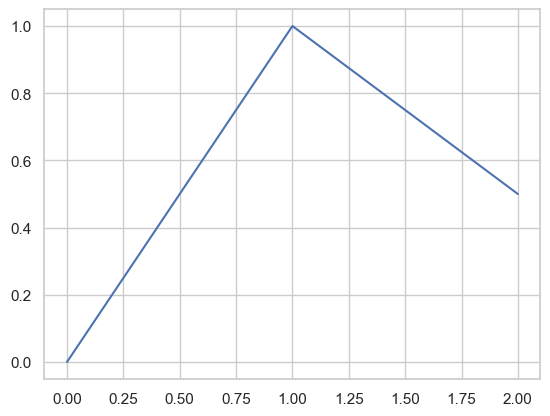

In [89]:
plt.figure()
plt.plot([0, 1, 0.5])
plt.show()

Списки $x$ и $y$ координат точек. Точки соединяются прямыми, т.е. строится ломаная линия.

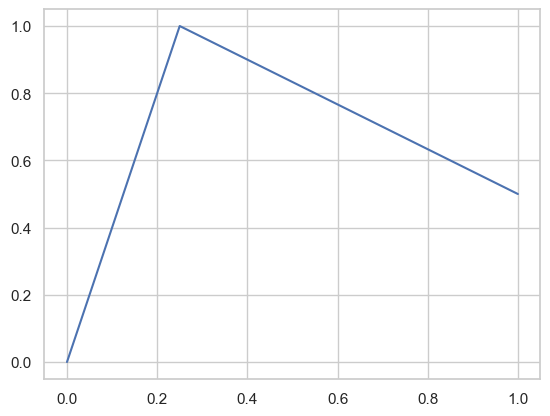

In [90]:
plt.figure()
plt.plot([0, 0.25, 1], [0, 1, 0.5])
plt.show()

Функция `scatter` просто рисует точки, не соединяя из линиями.

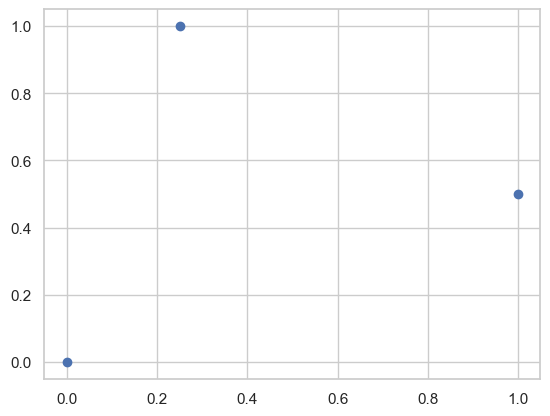

In [91]:
plt.figure()
plt.scatter([0, 0.25, 1], [0, 1, 0.5])
plt.show()

$x$-координаты не обязаны монотонно возрастать. Тут, например, мы строим замкнутый многоугольник.

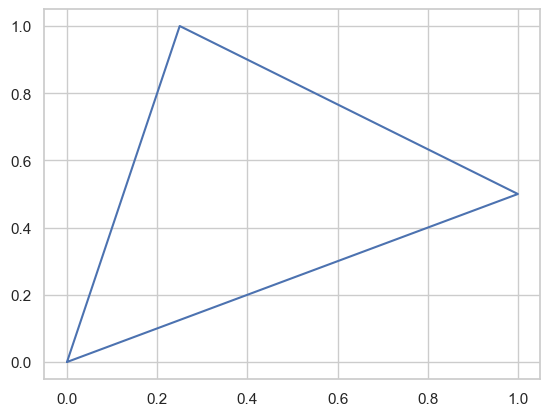

In [92]:
plt.figure()
plt.plot([0, 0.25, 1, 0], [0, 1, 0.5, 0])
plt.show()

Когда точек много, ломаная неотличима от гладкой кривой.

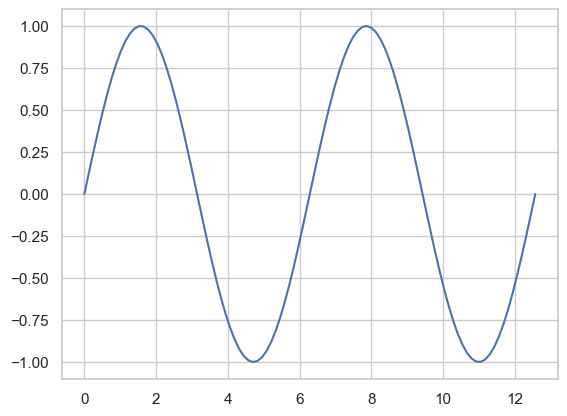

In [93]:
x = np.linspace(0, 4 * np.pi, 100)

plt.figure()
plt.plot(x, np.sin(x))
plt.show()

Массив $x$ не обязан быть монотонно возрастающим. Можно строить любую параметрическую линию $x=x(t)$, $y=y(t)$.

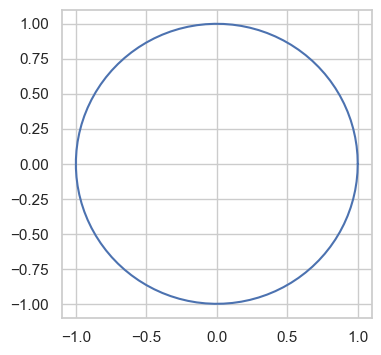

In [94]:
t = np.linspace(0, 2 * np.pi, 100)

plt.figure(figsize=(4,4))
plt.plot(np.cos(t), np.sin(t))
plt.show()

А вот одна из фигур Лиссажу.

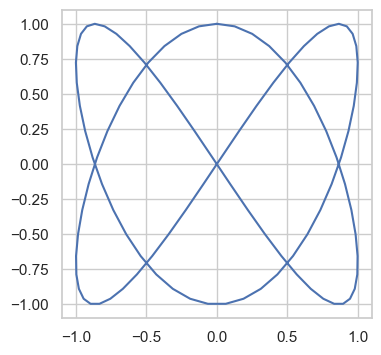

In [95]:
plt.figure(figsize=(4,4))
plt.plot(np.sin(2 * t), np.cos(3 * t))
plt.show()

Несколько кривых на одном графике. Каждая задаётся парой массивов — $x$ и $y$ координаты. По умолчанию, им присваиваются цвета из некоторой последовательности цветов; разумеется, их можно изменить. Вообще говоря, подобным кодом не стоит пользоваться.

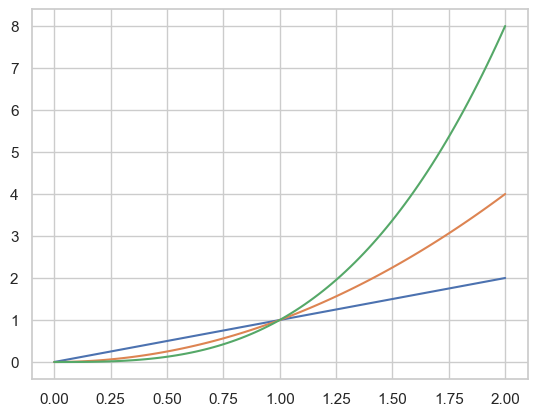

In [96]:
x = np.linspace(0, 2, 100)

plt.figure()
plt.plot(x, x, x, x**2, x, x**3)
plt.show()

Для простой регулировки цветов и типов линий после пары $x$ и $y$ координат вставляется форматная строка. Первая буква определяет цвет (`'r'` — красный, `'b'` — синий и т.д.), дальше задаётся тип линии (`'-'` — сплошная, `'--'` — пунктирная, `'-.'` — штрих-пунктирная и т.д.).

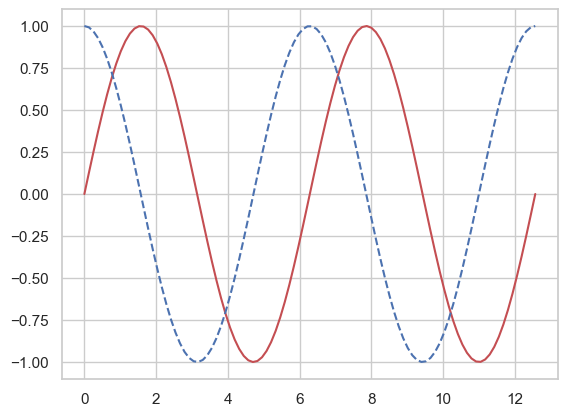

In [97]:
x = np.linspace(0, 4 * np.pi, 100)

plt.figure()
plt.plot(x, np.sin(x), 'r-')
plt.plot(x, np.cos(x), 'b--')
plt.show()

Если в качестве "типа линии" указано `'o'`, то это означает рисовать точки кружочками и не соединять их линиями; аналогично, `'s'` означает квадратики. Конечно, такие графики имеют смысл только тогда, когда точек не очень много.

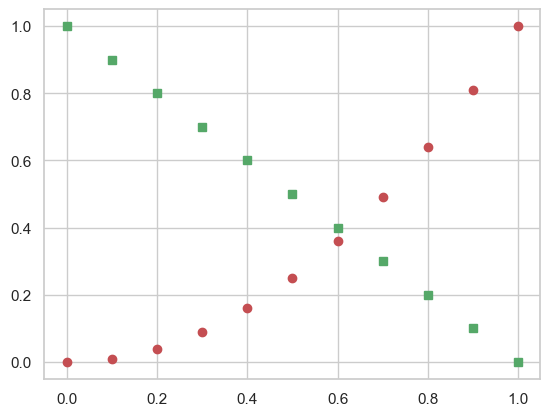

In [98]:
x = np.linspace(0, 1, 11)

plt.figure()
plt.plot(x, x ** 2, 'ro')
plt.plot(x, 1 - x, 'gs')
plt.show()

Вот пример настройки почти всего, что можно настроить. Можно задать последовательность засечек на оси $x$ (и $y$) и подписи к ним, в которых, как и в других текстах, можно использовать $\LaTeX$-овские обозначения. Задать подписи осей $x$ и $y$ и заголовок графика. Во всех текстовых элементах можно задать размер шрифта. Можно задать толщину линий и штрихи. В примере ниже на графике косинуса рисуется штрих длины 8, потом участок длины 4 не рисуется, потом участок длины 2 рисуется, потом участок длины 4 опять не рисуется, и так по циклу; поскольку толщина линии равна 2, эти короткие штрихи длины 2 фактически выглядят как точки. Можно задать подписи к кривым (legend); где разместить эти подписи тоже можно регулировать.

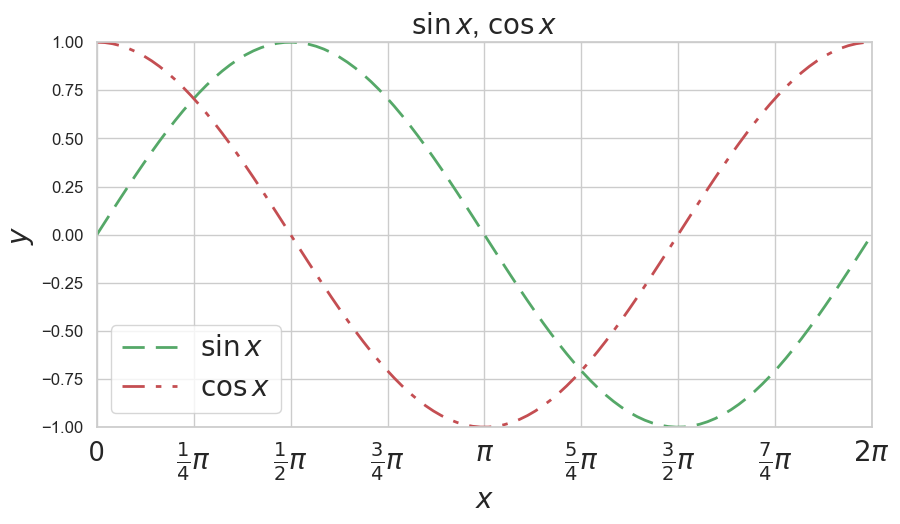

In [99]:
x = np.linspace(0, 2 * np.pi, 100)

plt.figure(figsize=(10, 5))
plt.plot(x, np.sin(x), linewidth=2, color='g', dashes=[8, 4], label=r'$\sin x$')
plt.plot(x, np.cos(x), linewidth=2, color='r', dashes=[8, 4, 2, 4], label=r'$\cos x$')
plt.axis([0, 2 * np.pi, -1, 1])
plt.xticks(np.linspace(0, 2 * np.pi, 9),  # Где сделать отметки
           ('0',r'$\frac{1}{4}\pi$',r'$\frac{1}{2}\pi$',  # Как подписать
            r'$\frac{3}{4}\pi$',r'$\pi$',r'$\frac{5}{4}\pi$',
            r'$\frac{3}{2}\pi$',r'$\frac{7}{4}\pi$',r'$2\pi$'),
           fontsize=20)
plt.yticks(fontsize=12)
plt.xlabel(r'$x$', fontsize=20)
plt.ylabel(r'$y$', fontsize=20)
plt.title(r'$\sin x$, $\cos x$', fontsize=20)
plt.legend(fontsize=20, loc=0)
plt.show()

**Упражнение:** постройте пунктирный график функции $y = x^3$. Подпишите оси, заголовок и легенду. 

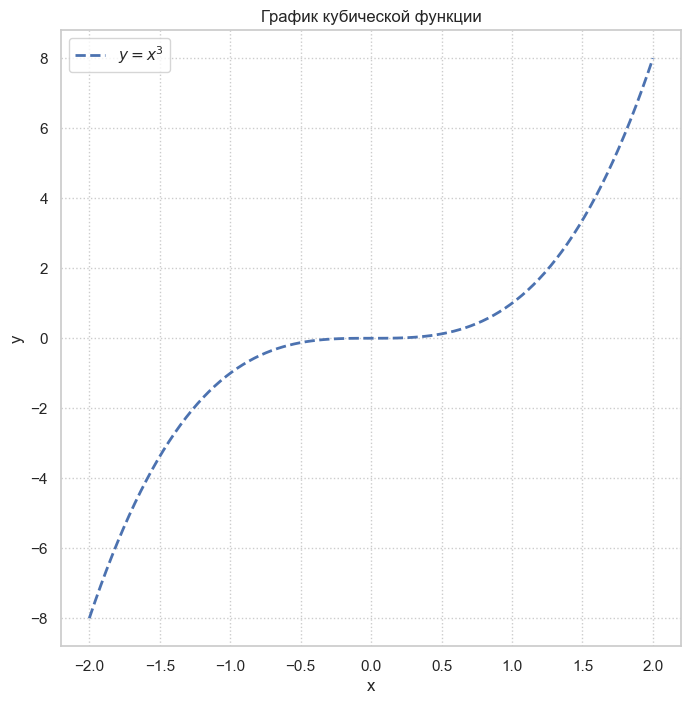

In [100]:
x = np.linspace(-2, 2, 100)

plt.figure(figsize=(8, 8))
plt.plot(x, x**3, linestyle='--', lw=2, label='$y=x^3$')
plt.xlabel('x'), plt.ylabel('y')
plt.legend()
plt.title('График кубической функции')
plt.grid(ls=':')
plt.show()

Если `linestyle=''`, то точки не соединяются линиями. Сами точки рисуются маркерами разных типов. Тип определяется строкой из одного символа, который чем-то похож на нужный маркер. В добавок к стандартным маркерам, можно определить самодельные.

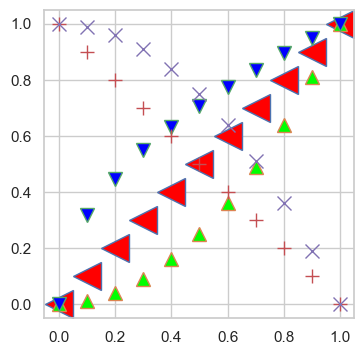

In [101]:
x = np.linspace(0, 1, 11)

plt.figure(figsize=(4, 4))
plt.plot(x, x, linestyle='', marker='<', markersize=20, markerfacecolor='#FF0000')
plt.plot(x, x ** 2, linestyle='', marker='^', markersize=10, markerfacecolor='#00FF00')
plt.plot(x, x ** (1/2), linestyle='', marker='v', markersize=10, markerfacecolor='#0000FF')
plt.plot(x, 1 - x, linestyle='', marker='+', markersize=10, markerfacecolor='#0F0F00')
plt.plot(x, 1 - x ** 2, linestyle='', marker='x', markersize=10, markerfacecolor='#0F000F')
plt.axis([-0.05, 1.05, -0.05, 1.05])
plt.show()


Если $y$ меняется на много порядков, то удобно использовать логарифмический масштаб по $y$.

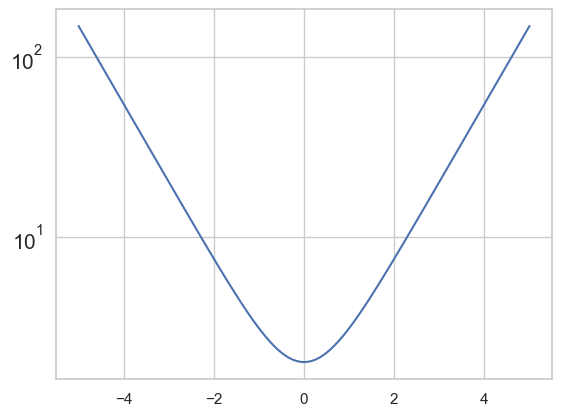

In [102]:
x = np.linspace(-5, 5, 100)

plt.figure()
plt.plot(x, np.exp(x) + np.exp(-x))
plt.yscale('log')
plt.yticks(fontsize=15)
plt.show()

Можно задать логарифмический масштаб по обоим осям.

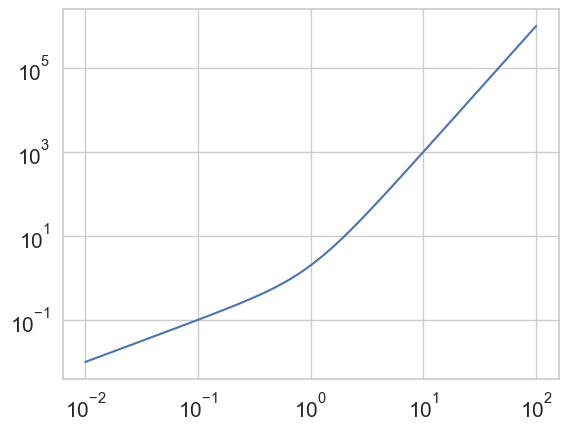

In [103]:
x = np.logspace(-2, 2, 100)

plt.figure()
plt.plot(x, x + x ** 3)
plt.xscale('log'), plt.xticks(fontsize=15)
plt.yscale('log'), plt.yticks(fontsize=15)
plt.show()

### 2. Более сложные графики

#### 2.1. Полярные координаты

Первый массив — $\varphi$, второй — $r$. Вот спираль.

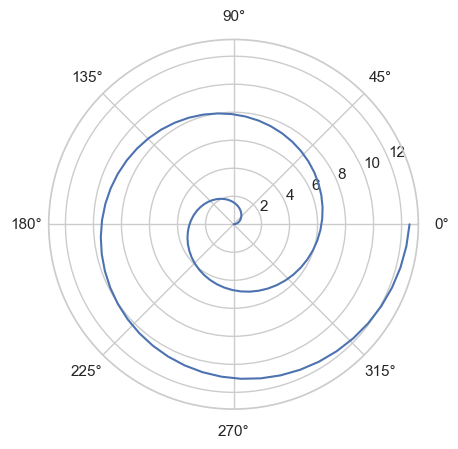

In [104]:
t = np.linspace(0, 4 * np.pi, 100)

plt.figure()
plt.polar(t, t)
plt.show()

А это угловое распределение пионов в $e^+ e^-$ аннигиляции.

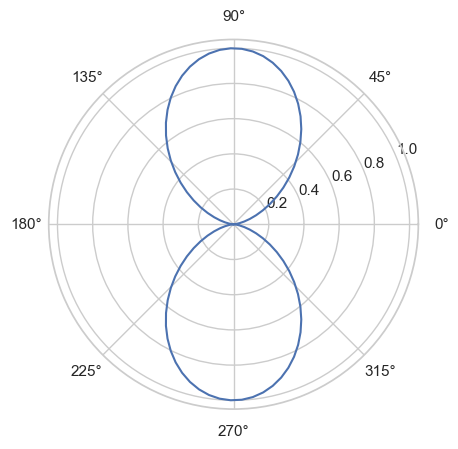

In [105]:
phi = np.linspace(0, 2 * np.pi, 100)

plt.figure()
plt.polar(phi, np.sin(phi) ** 2)
plt.show()

#### 2.2. Контурные графики

Пусть мы хотим изучить поверхность $z=xy$. Вот её горизонтали.

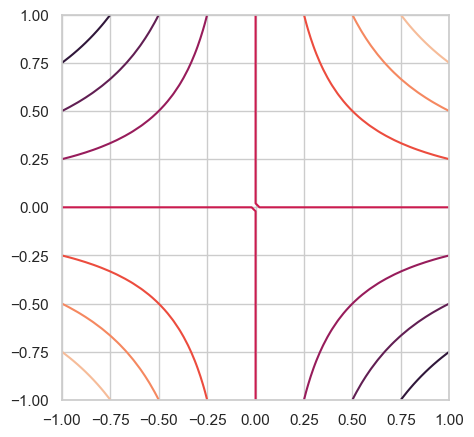

In [106]:
x = np.linspace(-1, 1, 50)
y = x
z = np.outer(x, y)

plt.figure(figsize=(5,5))
plt.contour(x, y, z)
plt.show()

Что-то их маловато. Сделаем побольше и подпишем.

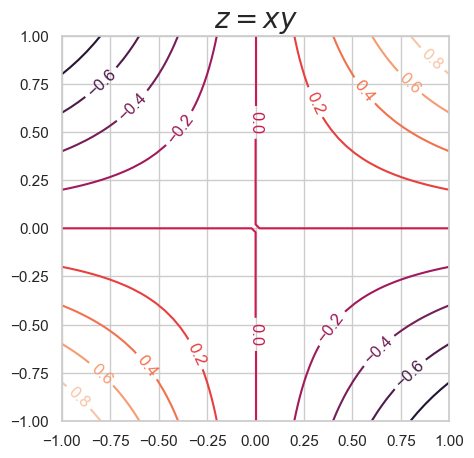

In [107]:
plt.figure(figsize=(5,5))
curves = plt.contour(x, y, z, np.linspace(-1, 1, 11))
plt.clabel(curves)
plt.title(r'$z=xy$', fontsize=20)
plt.show()

А здесь высота даётся цветом, как на физических географических картах. Функция `colorbar` показывает соответствие цветов и значений $z$.

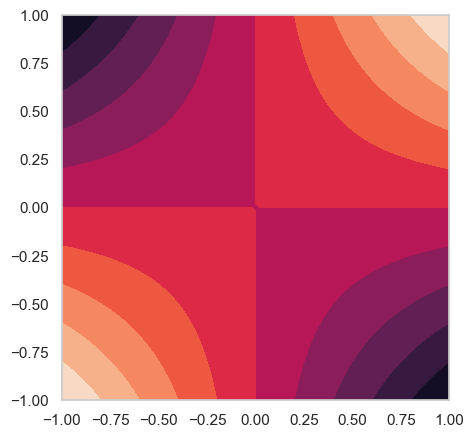

In [108]:
plt.figure(figsize=(5,5))
plt.contourf(x, y, z, np.linspace(-1, 1, 11))
# plt.colorbar()
plt.show()

#### 2.3. Images (пиксельные картинки)

Картинка задаётся массивом `z`: `z[i,j]` — это цвет пикселя `i,j`, массив из 3 элементов (`rgb`, числа от 0 до 1).

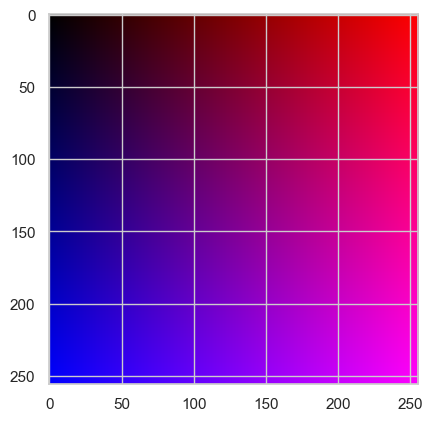

In [110]:
n = 256
u = np.linspace(0, 1, n)
x, y = np.meshgrid(u, u)
z = np.zeros((n, n, 3))
z[:, :, 0] = x
z[:, :, 2] = y

plt.figure()
plt.imshow(z)
plt.show()

Можно загрузить картинку из файла.
Это будет обычный `numpy.array`.
Размерность картинки $280 \times 280$.
По последней координате цвета RGB и прозрачность.

In [111]:
picture = plt.imread('python.png')
print(type(picture), picture.shape)

plt.imshow(picture)
plt.axis('off')
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'python.png'

#### 2.4.  Трёхмерная линия

Задаётся параметрически: $x=x(t)$, $y=y(t)$, $z=z(t)$.

In [112]:
t = np.linspace(0, 4 * np.pi, 100)
x = np.cos(t)
y = np.sin(t)
z = t / (4 * np.pi)

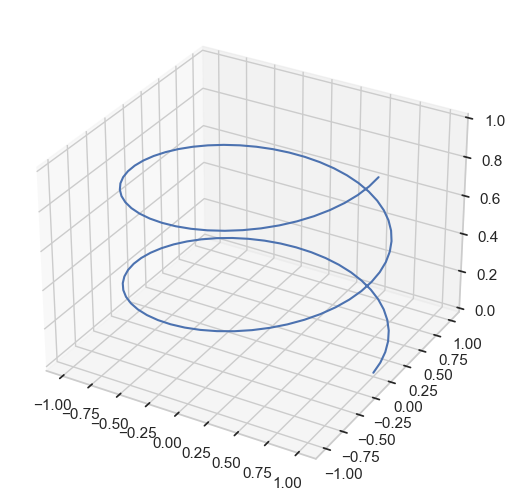

In [113]:
fig = plt.figure()
ax = Axes3D(fig)
fig.add_axes(ax) 
ax.plot(x, y, z)
plt.show()

К сожалению, inline трёхмерную картинку нельзя вертеть мышкой. Это можно делать с трёхмерными картинками в отдельных окнах. Но можно задать, с какой стороны мы смотрим.

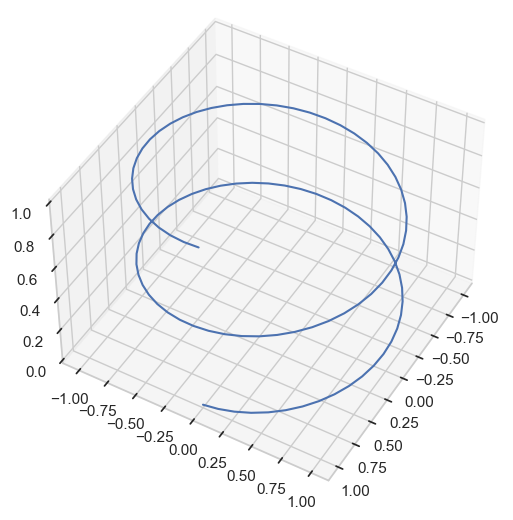

In [114]:
fig = plt.figure()
ax = Axes3D(fig)
ax.elev, ax.azim = 45, 30
fig.add_axes(ax)
ax.plot(x, y, z)
plt.show()

#### 2.5.  Поверхности

Все поверхности параметрические: $x=x(u,v)$, $y=y(u,v)$, $z=z(u,v)$. Если мы хотим построить явную поверхность $z=z(x,y)$, то удобно создать массивы $x=u$ и $y=v$ функцией `meshgrid`.

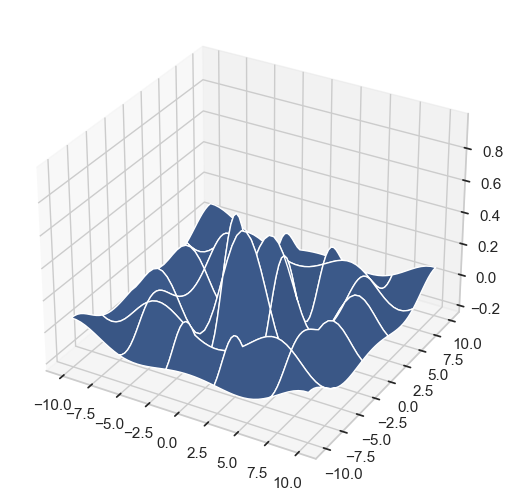

In [115]:
X = 10
N = 50
u = np.linspace(-X, X, N)
x, y = np.meshgrid(u, u)
r = np.sqrt(x ** 2 + y ** 2)
z = np.sin(r) / r

fig = plt.figure()
ax = Axes3D(fig)
fig.add_axes(ax)
ax.plot_surface(x, y, z, rstride=10, cstride=10)
plt.show()

Есть много встроенных способов раскраски поверхностей. Так, в методе `gnuplot` цвет зависит от высоты $z$.

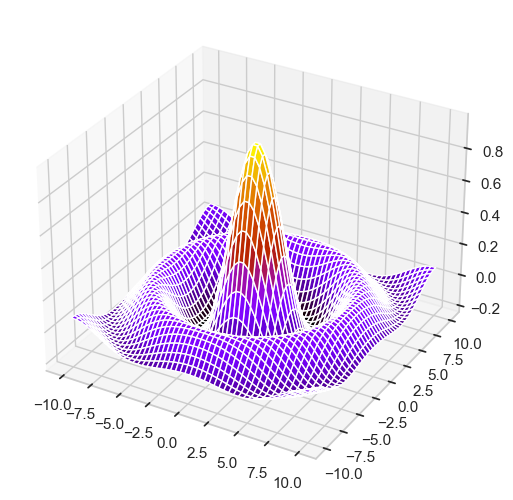

In [116]:
fig = plt.figure()
ax = Axes3D(fig)
fig.add_axes(ax)
ax.plot_surface(x, y, z, rstride=1, cstride=1, cmap='gnuplot')
plt.show()

Построим бублик — параметрическую поверхность с параметрами $\theta$, $\varphi$.

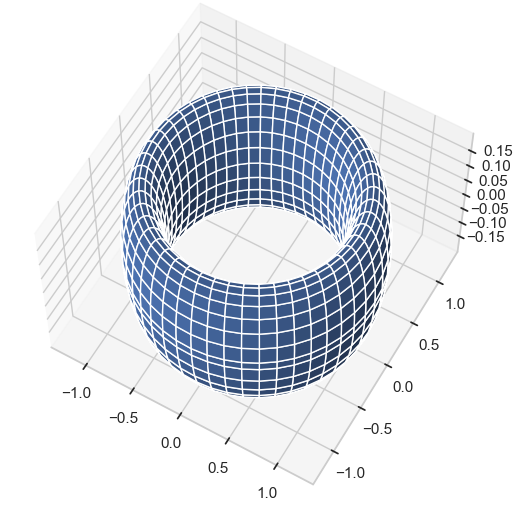

In [117]:
t = np.linspace(0, 2 * np.pi, 50)
th, ph = np.meshgrid(t, t)
r = 0.2
x, y, z = (1 + r * np.cos(ph)) * np.cos(th), (1 + r * np.cos(ph)) * np.sin(th), r * np.sin(ph)

fig = plt.figure()
ax = Axes3D(fig)
fig.add_axes(ax)
ax.elev = 60
ax.plot_surface(x, y, z, rstride=2, cstride=1)
plt.show()


## Библиотека Seaborn


[Seaborn](https://seaborn.pydata.org/) — популярная библиотека готовых шаблонов для статистической визуализации, написанная на бэкенде `matplotlib`. Две основные причины не проходить мимо:
1. Выразительный высокоуровневый интерфейс: построение большинства простых графиков происходит в одну строчку кода.
2. Более эстетичные графики: часто встроенные в `seaborn` стили достаточно хороши и без вашего вмешательства.


In [118]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

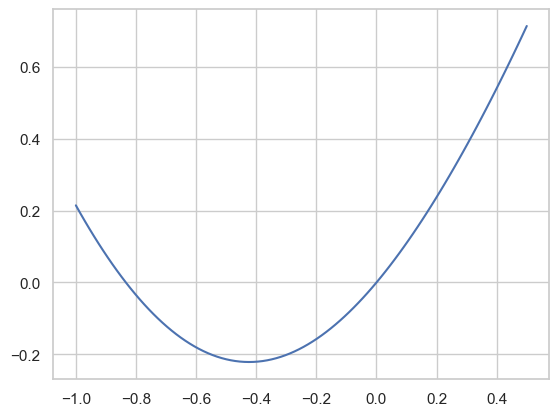

In [119]:
x = np.linspace(-1, 0.5, 100)
y = np.arctan(x)+x**2
plt.plot(x, y)


Начнём с простого: рассмотрим отрисовку  синуса при помощи matplotlib и улучшим её с помощью seaborn.

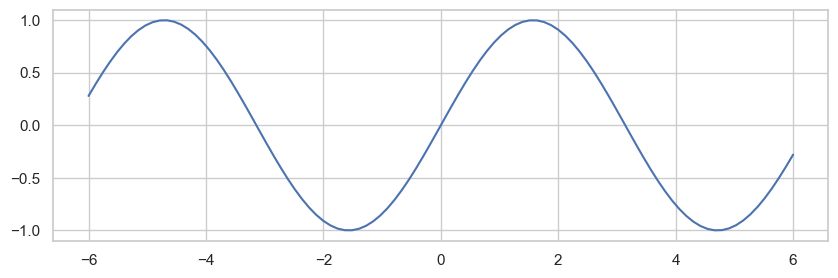

In [120]:
plt.figure(figsize=(10, 3))
sns.set(style='whitegrid')
x = np.linspace(-6, 6, 100)
plt.plot(x, np.sin(x))

#### Ирисы Фишера

Теперь более интересный пример. Загрузим датасет Ирисы Фишера — [классический учебный датасет](https://en.wikipedia.org/wiki/Iris_flower_data_set), который встроен в seaborn. Числовые столбцы отвечают за длину и ширину наружной и внутренней доли околоцветника для трех сортов ириса: setosa, virginica, versicolor.


In [121]:
iris = sns.load_dataset('iris')
iris.sample(5)

,sepal_length,sepal_width,petal_length,petal_width,species
53,5.5,2.3,4.0,1.3,versicolor
11,4.8,3.4,1.6,0.2,setosa
97,6.2,2.9,4.3,1.3,versicolor
74,6.4,2.9,4.3,1.3,versicolor
129,7.2,3.0,5.8,1.6,virginica


**displot**

displot  показывает гистограмму  распределения.

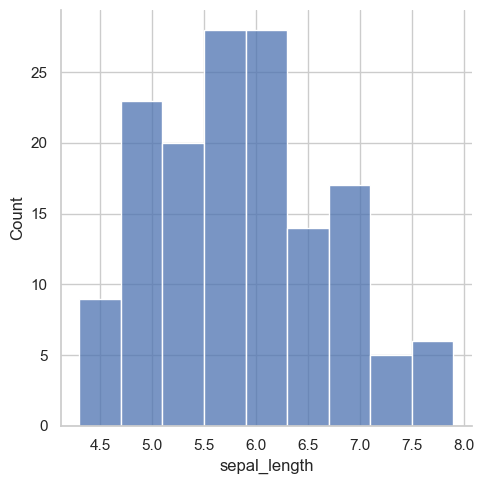

In [122]:
sns.displot(iris['sepal_length']);

**kdeplot**

kdeplot - график плотности распределения

<Axes: xlabel='petal_width', ylabel='Density'>

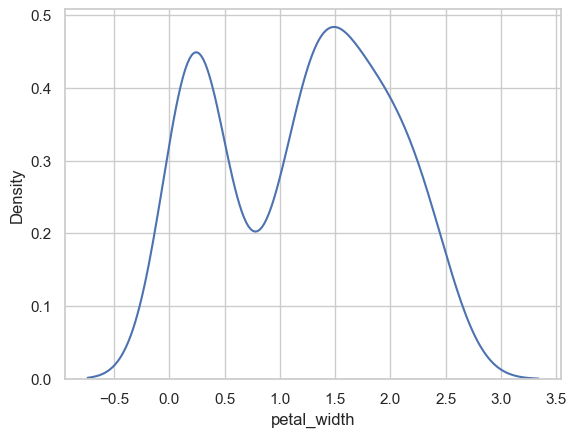

In [123]:
sns.kdeplot(iris['petal_width'])

Линейный график — **Line Plot**

воспользуемся функцией lineplot с набором данных и столбцами, представляющими оси x и y.

<Axes: xlabel='sepal_length', ylabel='petal_length'>

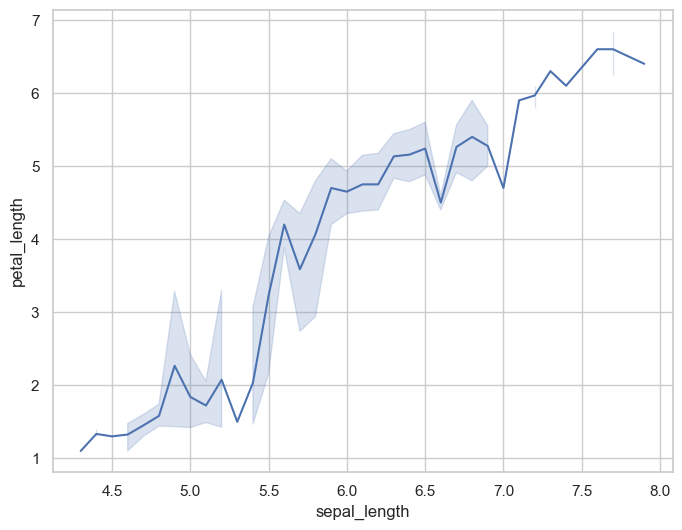

In [124]:
plt.figure(figsize=(8, 6))
sns.lineplot(data=iris, x="sepal_length", y="petal_length")

 PairGrid

Сетка графиков для визуализации попарных отношений в данных.

`class sns.PairGrid(data, hue=None, hue_order=None, palette=None, hue_kws=None, vars=None, x_vars=None, y_vars=None, diag_sharey=True, size=2.5, aspect=1, despine=True, dropna=True)`

* `data` &mdash; данные;
* `hue` &mdash; категории, которые будут закрашиваться в разные цвета;
* `palette` &mdash; цветовая схема, может быть задана в виде словаря цветов;
* `height` &mdash; высота каждой грани (в дюймах).

Возвращает объект, у которого доступны перечисленные ниже функции. В эти функции нужно передать функцию `func`, с помощью которой будет построен график по паре переменных (или по одной на диагонали), а так же параметры этой функции.


-------------------

Визуализируем данные об ирисах Фишера.
* на диагонали расположим одномерные ядерные оценки плотности;
* под диагональю &mdash; двумерные;
* над диагональю изобразим сами точки.

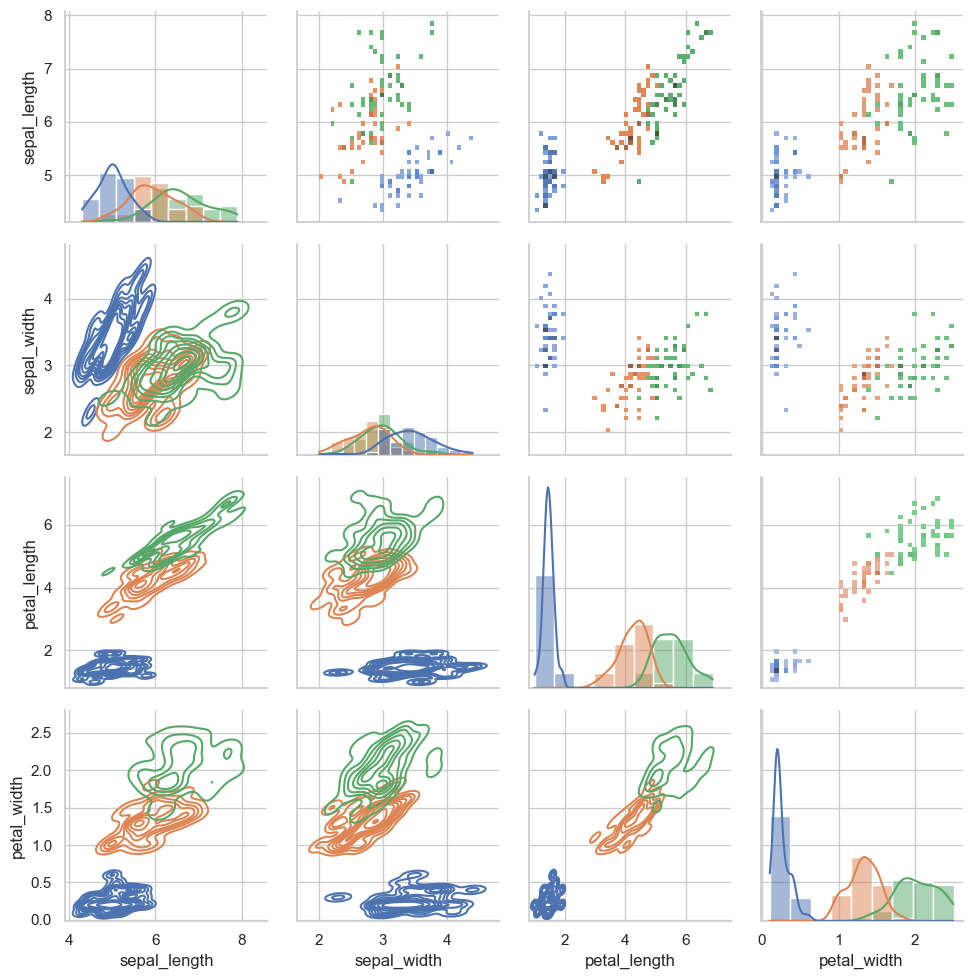

In [125]:
g = sns.PairGrid(iris, hue="species")
g.map_upper(sns.histplot,bins=40)
g.map_lower(sns.kdeplot, bw_adjust=0.7)
g.map_diag(sns.histplot, kde=True);

**Heatmap**

Визуализирует двумерную таблицу в виде тепловой карты.

sns.heatmap(data, vmin=None, vmax=None, cmap=None, center=None, robust=False, annot=None, fmt='.2g', annot_kws=None, linewidths=0, linecolor='white', cbar=True, cbar_kws=None, cbar_ax=None, square=False, xticklabels='auto', yticklabels='auto', mask=None, ax=None, **kwargs)

data — 2D-данные;

vmin и vmax — минимальное и максимальное значения цветов;

cmap — цветовая схема;

annot — в какие ячейки записывать данные;

fmt — формат записи данных

linewidths — ширина линий между ячейками;

linecolor — цвет линий между ячейками;

cbar — рисовать ли colorbar.

Типичное применение — визуализация корреляции между признаками.

In [ ]:
iris.corr()

In [ ]:
plt.figure(figsize=(7, 5))
sns.heatmap(iris.corr(), annot=True,  cmap="YlGnBu")

**3d графики с matplotlib**

In [ ]:
d={'setosa':0,'virginica':1, 'versicolor':2}
iris['species']=iris['species'].map(d)
iris.sample(5)


In [ ]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(iris['petal_length'], iris['sepal_length'], iris['sepal_width'], c=iris['species'],    s=50, cmap="viridis")

**Визуализация категориальных данных**

In [ ]:
sns.countplot(x='species', data=iris);

In [ ]:
sns.barplot(x='species', y='petal_length', data=iris);

-----


Больше примеров https://seaborn.pydata.org/examples/ и [https://python-graph-gallery.com/](https://python-graph-gallery.com/)